In [3]:
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib as mpl

Using TensorFlow backend.


In [84]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])])

for i in range (0, 19):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [7]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [9]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, restore_best_weights=True)

In [10]:
x_train.shape

(50000, 32, 32, 3)

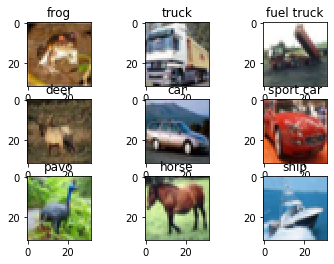

In [11]:
class_names = ['frog','truck','fuel truck','deer','car',
               'sport car','pavo','horse','ship']

fig = plt.figure()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.gca().set_title(class_names[i])
    plt.imshow(x_train[i])
plt.show()

In [12]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[es],verbose=2,epochs=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000


KeyboardInterrupt: 

In [13]:
# try to reshape model to using PCA
'''
from sklearn.decomposition import PCA 
pca = PCA(n_components=0.97)
x_train_pca = pca.fit_transform(x_train)
'''

'\nfrom sklearn.decomposition import PCA \npca = PCA(n_components=0.97)\nx_train_pca = pca.fit_transform(x_train)\n'

In [14]:
d1, d2, d3, d4 = x_train.shape
x_train_1d = x_train.reshape((d1,d2*d3*d4))
print(x_train_1d.shape)

(50000, 3072)


In [23]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=0.97)
X_reduced_train = pca.fit_transform(x_train_1d[:5000])
print(X_reduced_train.shape)
Y_reduced_train = y_train[:5000]
print(Y_reduced_train.shape)

(5000, 309)
(5000, 1)


In [25]:
d1, d2, d3, d4 = x_test.shape
x_test_1d = x_test.reshape((d1,d2*d3*d4))
print(x_test_1d.shape)

(10000, 3072)


In [26]:
X_reduced_test = pca.fit_transform(x_test_1d[:1000])
print(X_reduced_test.shape)
Y_reduced_test = y_test[:1000]
print(Y_reduced_test.shape)

(1000, 236)
(1000, 1)


In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[309])])

for i in range (0, 19):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(X_reduced[:4000],Y_reduced[:4000],validation_data=(x_test[4000:5000],y_test[4000:5000]),callbacks=[es],verbose=2,epochs=1000)

ValueError: Error when checking input: expected flatten_4_input to have shape (309,) but got array with shape (321,)

# Adding Bath Normalization

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])])

model.add(keras.layers.BatchNormalization())
for i in range (0, 19):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[es],verbose=2,epochs=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 43s - loss: 1.8671 - accuracy: 0.3268 - val_loss: 1.6970 - val_accuracy: 0.3934
Epoch 2/1000
50000/50000 - 30s - loss: 1.6982 - accuracy: 0.3949 - val_loss: 1.6070 - val_accuracy: 0.4205
Epoch 3/1000
50000/50000 - 32s - loss: 1.6256 - accuracy: 0.4181 - val_loss: 1.5086 - val_accuracy: 0.4629
Epoch 4/1000
50000/50000 - 34s - loss: 1.5649 - accuracy: 0.4438 - val_loss: 1.4873 - val_accuracy: 0.4728
Epoch 5/1000
50000/50000 - 33s - loss: 1.5161 - accuracy: 0.4636 - val_loss: 1.4625 - val_accuracy: 0.4811
Epoch 6/1000
50000/50000 - 32s - loss: 1.4714 - accuracy: 0.4809 - val_loss: 1.4213 - val_accuracy: 0.5009
Epoch 7/1000
50000/50000 - 32s - loss: 1.4409 - accuracy: 0.4889 - val_loss: 1.4305 - val_accuracy: 0.4939
Epoch 8/1000
50000/50000 - 31s - loss: 1.4130 - accuracy: 0.4997 - val_loss: 1.3693 - val_accuracy: 0.5181
Epoch 9/1000
50000/50000 - 31s - loss: 1.3844 - accuracy: 0.5121 - val_loss: 1.3878 - val_accu

### Result for B.N.: SLOWER, BUT BETTER!

# Trying SELU (use LeCun normal init, and DNN contains only dense layers)

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])])

model.add(keras.layers.BatchNormalization())
for i in range (0, 19):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[es],verbose=2,epochs=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 27s - loss: 2.0451 - accuracy: 0.2427 - val_loss: 1.8102 - val_accuracy: 0.3288
Epoch 2/1000
50000/50000 - 22s - loss: 1.7723 - accuracy: 0.3462 - val_loss: 1.7101 - val_accuracy: 0.3795
Epoch 3/1000
50000/50000 - 23s - loss: 1.6728 - accuracy: 0.3934 - val_loss: 1.6647 - val_accuracy: 0.4021
Epoch 4/1000
50000/50000 - 23s - loss: 1.6032 - accuracy: 0.4210 - val_loss: 1.5578 - val_accuracy: 0.4449
Epoch 5/1000
50000/50000 - 23s - loss: 1.5585 - accuracy: 0.4412 - val_loss: 1.5787 - val_accuracy: 0.4370
Epoch 6/1000
50000/50000 - 23s - loss: 1.5102 - accuracy: 0.4617 - val_loss: 1.5438 - val_accuracy: 0.4562
Epoch 7/1000
50000/50000 - 23s - loss: 1.5145 - accuracy: 0.4602 - val_loss: 1.4846 - val_accuracy: 0.4695
Epoch 8/1000
50000/50000 - 23s - loss: 1.4513 - accuracy: 0.4806 - val_loss: 1.4601 - val_accuracy: 0.4810
Epoch 9/1000
50000/50000 - 23s - loss: 1.4170 - accuracy: 0.4981 - val_loss: 1.4884 - val_accu

### Result for SELU: 

# Trying alpha DROPOUT regularization:

In [47]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])])

for i in range (0, 19):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    model.add(keras.layers.Dropout(rate=0.2))

model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[es],verbose=2,epochs=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 40s - loss: 2.5448 - accuracy: 0.1018 - val_loss: 2.3153 - val_accuracy: 0.0978
Epoch 2/1000
50000/50000 - 33s - loss: 2.2815 - accuracy: 0.1281 - val_loss: 2.1384 - val_accuracy: 0.1668
Epoch 3/1000
50000/50000 - 31s - loss: 2.1569 - accuracy: 0.1624 - val_loss: 2.1130 - val_accuracy: 0.1745
Epoch 4/1000
50000/50000 - 27s - loss: 2.1350 - accuracy: 0.1656 - val_loss: 2.0970 - val_accuracy: 0.1613
Epoch 5/1000
50000/50000 - 24s - loss: 2.1420 - accuracy: 0.1671 - val_loss: 2.0847 - val_accuracy: 0.1898
Epoch 6/1000
50000/50000 - 29s - loss: 2.1208 - accuracy: 0.1698 - val_loss: 2.0818 - val_accuracy: 0.1605
Epoch 7/1000
50000/50000 - 31s - loss: 2.1176 - accuracy: 0.1710 - val_loss: 2.0759 - val_accuracy: 0.1899
Epoch 8/1000
50000/50000 - 26s - loss: 2.1144 - accuracy: 0.1708 - val_loss: 2.0790 - val_accuracy: 0.1886
Epoch 9/1000
50000/50000 - 24s - loss: 2.1197 - accuracy: 0.1686 - val_loss: 2.0670 - val_accu

## MC Dropout

In [88]:
import numpy as np
y_probas = np.stack([model(x_test, training=True) for sample in range(10)])

In [89]:
print(y_probas.shape)
print(np.round(y_probas, 2))

(10, 10000, 10)
[[[0.05 0.05 0.12 ... 0.11 0.01 0.03]
  [0.2  0.15 0.04 ... 0.03 0.26 0.22]
  [0.15 0.16 0.03 ... 0.02 0.29 0.29]
  ...
  [0.05 0.04 0.16 ... 0.11 0.02 0.02]
  [0.02 0.02 0.15 ... 0.09 0.   0.01]
  [0.02 0.03 0.11 ... 0.12 0.01 0.01]]

 [[0.04 0.03 0.14 ... 0.1  0.01 0.01]
  [0.16 0.18 0.04 ... 0.04 0.25 0.21]
  [0.17 0.16 0.03 ... 0.03 0.3  0.24]
  ...
  [0.04 0.03 0.14 ... 0.1  0.01 0.02]
  [0.03 0.03 0.12 ... 0.1  0.01 0.01]
  [0.03 0.03 0.13 ... 0.09 0.01 0.01]]

 [[0.03 0.04 0.1  ... 0.12 0.01 0.02]
  [0.13 0.15 0.02 ... 0.02 0.34 0.25]
  [0.17 0.17 0.03 ... 0.02 0.29 0.26]
  ...
  [0.04 0.04 0.14 ... 0.1  0.01 0.02]
  [0.03 0.02 0.15 ... 0.11 0.01 0.01]
  [0.06 0.06 0.14 ... 0.11 0.02 0.03]]

 ...

 [[0.02 0.02 0.15 ... 0.1  0.   0.01]
  [0.15 0.17 0.03 ... 0.03 0.27 0.25]
  [0.17 0.15 0.03 ... 0.02 0.28 0.26]
  ...
  [0.03 0.05 0.12 ... 0.12 0.01 0.02]
  [0.06 0.06 0.11 ... 0.13 0.02 0.04]
  [0.05 0.04 0.14 ... 0.12 0.01 0.02]]

 [[0.03 0.03 0.17 ... 0.1  0.01 0.

In [90]:
y_proba = y_probas.mean(axis=0)

In [100]:
y_pred = np.argmax(y_proba, axis=1).reshape((-1, 1))
print(y_pred)
print("------------------")
print(y_test)

[[6]
 [8]
 [9]
 ...
 [6]
 [6]
 [6]]
------------------
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [101]:
print("accuracy: ", np.sum(y_pred == y_test)/len(y_test))

accuracy:  0.1854


### In this example MC Dropout didn't give improvement, but this is how to do it.